# Example

In [19]:
import urllib2, base64
username = "olx"
password = "jksdf8962gSD"
request = urllib2.Request('https://partnerid.api.twiggle.com/v1.0/queries?q=black%20office%20chair%20with%20wheels')
base64string = base64.encodestring('%s:%s' % (username, password)).replace('\n', '')
request.add_header("Authorization", "Basic %s" % base64string)   
result = urllib2.urlopen(request)

# Method

In [55]:
def twiggle_query(query):
    query = "%20".join(query.split(" "))
    username = "olx"
    password = "jksdf8962gSD"
    url = 'https://partnerid.api.twiggle.com/v1.0/queries?q='+query
    request = urllib2.Request(url)
    base64string = base64.encodestring('%s:%s' % (username, password)).replace('\n', '')
    request.add_header("Authorization", "Basic %s" % base64string)   
    result = urllib2.urlopen(request)
    #return result
    r = [u for u in result]
    parsed = json.loads(r[0])
    return parsed
    #print json.dumps(parsed, indent=4, sort_keys=True)

In [49]:
twiggle_query('htc one m9')

{u'_id': u'692fa44e4cee11e7945d0ecee2762b04',
 u'_time': 10.746002197265625,
 u'engine_version': u'201706051015',
 u'interpretations': [],
 u'query_text': u'htc one m9'}

In [50]:
twiggle_query('Newbalance slippers NB')

{u'_id': u'9930bf0d4cee11e780a00e12f006e86c',
 u'_time': 14.813899993896484,
 u'engine_version': u'201706051015',
 u'interpretations': [{u'confidence_score': 0.6666666666666666,
   u'elements': [{u'labels': [u'Slipper'],
     u'spans': [{u'end': 19, u'start': 11}],
     u'type': u'type'},
    {u'labels': [u'Brand'],
     u'spans': [{u'end': 22, u'start': 20}],
     u'type': u'attribute'}],
   u'id': u'9930bf0c4cee11e780a00e12f006e86c',
   u'interpreted_query': {u'@combine': [{u'$concept': {u'@eq': u'Slipper'}},
     {u'$brand_s': {u'@eq': u'new_balance'}}]}}],
 u'query_text': u'Newbalance slippers NB'}

In [51]:
twiggle_query('Gildan polo shirt')

{u'_id': u'a994f2334cee11e7945d0ecee2762b04',
 u'_time': 10.786056518554688,
 u'engine_version': u'201706051015',
 u'interpretations': [{u'confidence_score': 1.0,
   u'elements': [{u'labels': [u'Brand'],
     u'spans': [{u'end': 6, u'start': 0}],
     u'type': u'attribute'},
    {u'labels': [u'PoloShirt'],
     u'spans': [{u'end': 17, u'start': 7}],
     u'type': u'type'}],
   u'id': u'a994f2324cee11e7945d0ecee2762b04',
   u'interpreted_query': {u'@combine': [{u'$concept': {u'@eq': u'PoloShirt'}},
     {u'$brand_s': {u'@eq': u'gildan'}}]}}],
 u'query_text': u'Gildan polo shirt'}

In [67]:
r = twiggle_query('Adidas Stan Smith Suade Red size 44 shoes')

In [68]:
iq = r["interpretations"][0]["interpreted_query"]['@combine']

In [69]:
iq

[{u'$concept': {u'@eq': u'Shoe'}},
 {u'apparel_collection_o': {u'name_s': {u'@eq': u'stan_smith'}}},
 {u'$brand_s': {u'@eq': u'adidas'}},
 {u'size_number_unit_o': {u'@and': [{u'unit_s': {u'@eq': u'eu'}},
    {u'value_n': {u'@eq': 44}}]}},
 {u'color_o': {u'$concept': {u'@eq': u'Red'}}}]

In [73]:
import requests

img_data = requests.get('https://apollo-ireland.akamaized.net/v1/files/h4jpvuqcrax52-GH/image;s=1080x1440').content
with open('image_name.jpg', 'wb') as handler:
    handler.write(img_data)

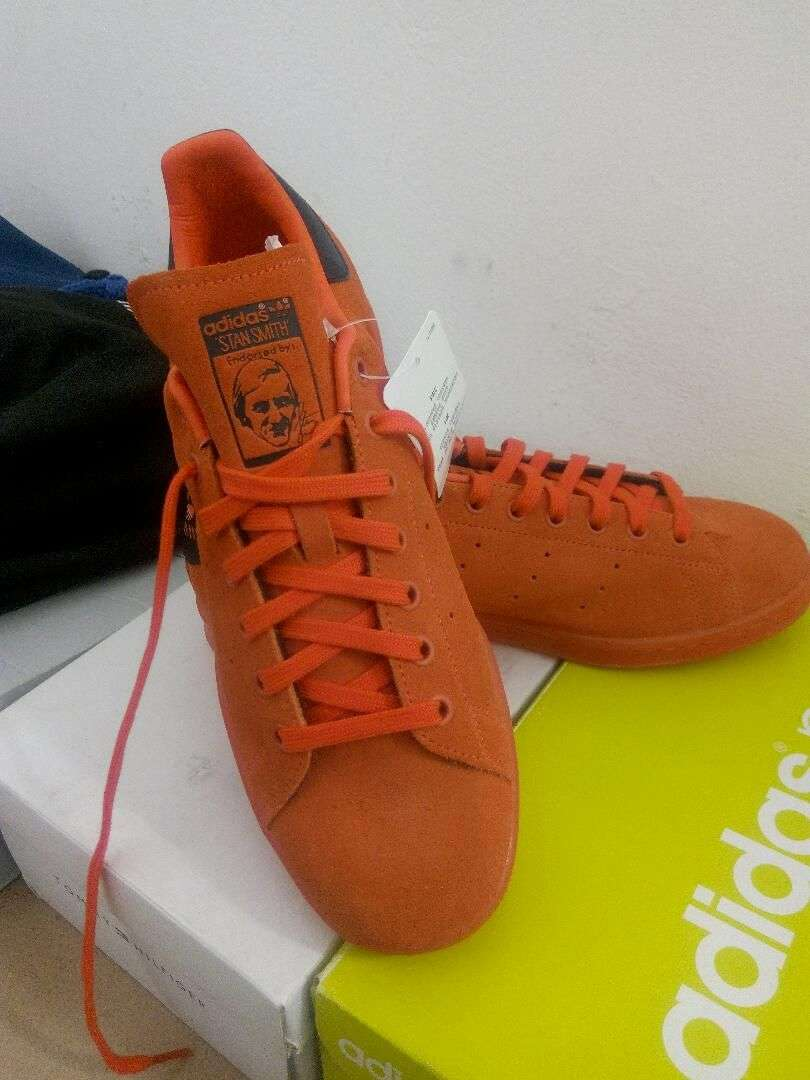

In [75]:
from IPython.display import Image
Image(filename='image_name.jpg', width = 300) 